Welcome to this tutorial on deep learning with Keras, where we'll dive into the fascinating world of natural language processing (NLP). In this hands-on tutorial, I'll guide you through building and training a neural network for a text classification task using the IMDb Movie Reviews dataset. By the end of this tutorial, you'll have a solid understanding of the essential concepts in deep learning and practical experience in implementing a neural network for an NLP task.

### What is Deep Learning?
Deep learning is a subset of machine learning that mimics the workings of the human brain to process data and create patterns for decision-making. It uses neural networks with multiple layers (hence "deep") to learn representations of data with multiple levels of abstraction. This approach has been incredibly successful in various domains, such as image recognition, speech processing, and natural language understanding.

#### Key characteristics of deep learning include:

* Hierarchical Feature Learning: Deep learning models can automatically discover and learn hierarchical features from the input data.
* End-to-End Learning: These models can be trained end-to-end, directly mapping inputs to desired outputs.
* Scalability: Deep learning models often improve with more data and computational power.

### What is Keras?
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed to enable fast experimentation and is user-friendly, modular, and extensible. With Keras, you can quickly build and train deep learning models with just a few lines of code.

#### Key characteristics of Keras
* Simplicity and Ease of Use: Keras offers a simple and consistent interface optimized for common use cases, making it easy to build and train models.
* Modularity: Models are made by connecting configurable building blocks, making the framework highly modular.
* Support for Multiple Backends: Keras can run on top of TensorFlow, CNTK, or Theano, allowing flexibility and compatibility with various ecosystems.

### Dataset

We will use the keras dataset module to download the data, but you can find more information about the data here:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Step 1: Load data

In [1]:
from keras.datasets import imdb

# Load the IMDb dataset
# num_words=10000 means we only keep the top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")

17464789/17464789 [==============================] - 0s 0us/step
Training samples: 25000
Test samples: 25000


In [2]:
# The train_data and test_data arrays contain lists of integers,
# where each integer represents a word in a review. The train_labels and test_labels
# arrays contain binary labels (0 for negative and 1 for positive).

# Print an example review (as a sequence of integers)
print(train_data[0])

# Print the corresponding label
print(train_labels[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
# To make the review more interpretable, we can decode it back to
# words using the Keras get_word_index() function:

# Get the word index
word_index = imdb.get_word_index()

# Reverse the word index to get a mapping from integer to word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the review back to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

# Step 2: Prepare the data

After loading the data, we need to clean and prepare it for our task. The code below shows some of the most common preprocessing steps required when dealing with text. This is by no means an exhaustive list.

If you run this notebook, please pick which preprocessing method you want to use (padding, One Hot Encoding, or Embeddings). In todays world, embeddings are the most common approach.

In [4]:
# Neural networks expect input data to be of uniform shape.
# Since reviews have varying lengths, we'll pad them to the same length
from keras.preprocessing.sequence import pad_sequences

# Pad sequences to a maximum length of 256
max_length = 256
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

print(f"Padded training sample: {train_data[0]}")


Padded training sample: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1   14   22   16
   43  530  973 1622 1385   65  458 4468   66 3941    4  173   36  256
    5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   

In [5]:
# Alternatively, we can one-hot encode the sequences.
# This method converts each integer into a binary vector:
import numpy as np

def one_hot_encode(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# One-hot encode the training and test data
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

print(f"One-hot encoded training sample: {x_train[0]}")


One-hot encoded training sample: [1. 1. 1. ... 0. 0. 0.]


In [6]:
# Keras provides an Embedding layer that can be used to learn word embeddings from the data.
# We don't need to one-hot encode or pad sequences for this method,
# as the Embedding layer can handle integer-encoded sequences directly.
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define a simple model with an Embedding layer
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8193      
                                                                 
Total params: 328193 (1.25 MB)
Trainable params: 328193 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Step 3: Building the network

Below you find an example (very simple) neural network built using embeddings for our text data. The neural network includes an embedding layer, followed by a flattening layer and a dense layer for classification.

In [7]:
# Define the network architecture. Start by defining a sequential model and adding the necessary layers.
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Define the model
model = Sequential()

# Add an Embedding layer
# input_dim is the size of the vocabulary (10,000 words)
# output_dim is the dimension of the dense embedding (e.g., 32)
# input_length is the length of the input sequences (256 words)
model.add(Embedding(input_dim=10000, output_dim=32, input_length=256))

# Add a Flatten layer to flatten the 3D tensor to 2D
model.add(Flatten())

# Add a Dense layer with a single output unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))


In [8]:
# Compile the model. We use the binary crossentropy loss function because this is a binary classification problem,
# and we'll use the RMSprop optimizer.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 32)           320000    
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 328193 (1.25 MB)
Trainable params: 328193 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model. We use a validation split to monitor the performance of the model on unseen data during training.
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 14ms/step - loss: 0.5153 - accuracy: 0.7406 - val_loss: 0.3345 - val_accuracy: 0.8642
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2640 - accuracy: 0.8936 - val_loss: 0.2873 - val_accuracy: 0.8822
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1956 - accuracy: 0.9266 - val_loss: 0.2915 - val_accuracy: 0.8794
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.1446 - accuracy: 0.9506 - val_loss: 0.2902 - val_accuracy: 0.8882
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1007 - accuracy: 0.9701 - val_loss: 0.3049 - val_accuracy: 0.8848
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0658 - accuracy: 0.9835 - val_loss: 0.3271 - val_accuracy: 0.8848
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0398 - accuracy: 0.9920 - val_loss: 0.3585 - val_accuracy: 0.8766
Epo

# Step 4: Evaluate the model

### Evaluation Metrics in Deep Learning

Evaluation metrics are essential to understand how well a model performs on a given dataset. Different metrics provide different insights into the performance, and the choice of metric often depends on the nature of the task (classification, regression, etc.) and the specific goals of the model. Here, we'll focus on metrics commonly used in classification tasks, especially binary classification as in our IMDb movie review example.

#### Common Evaluation Metrics for Classification

1. **Accuracy**
    - **Definition**: The ratio of correctly predicted instances to the total instances.
    - **Formula**: \(\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}\)
    - **When to Use**: Best for balanced datasets where the number of instances of each class is roughly equal.

2. **Precision**
    - **Definition**: The ratio of correctly predicted positive observations to the total predicted positives.
    - **Formula**: \(\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}\)
    - **When to Use**: Important when the cost of false positives is high.

3. **Recall (Sensitivity or True Positive Rate)**
    - **Definition**: The ratio of correctly predicted positive observations to the all observations in actual class.
    - **Formula**: \(\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}\)
    - **When to Use**: Important when the cost of false negatives is high.

4. **F1 Score**
    - **Definition**: The harmonic mean of precision and recall.
    - **Formula**: \(\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\)
    - **When to Use**: Useful when the dataset is imbalanced and you want a balance between precision and recall.

5. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
    - **Definition**: Measures the ability of the model to distinguish between classes.
    - **Interpretation**: An ROC curve is a plot of the true positive rate (recall) against the false positive rate. The AUC (area under the curve) represents the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.
    - **When to Use**: Good for imbalanced datasets; provides a single measure of overall performance.

6. **Logarithmic Loss (Log Loss)**
    - **Definition**: Measures the performance of a classification model where the prediction is a probability value between 0 and 1.
    - **Formula**: \(\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]\)
    - **When to Use**: Provides a probability-based metric, useful when you need to evaluate probabilistic predictions.

In [10]:
# # In Keras, you can specify evaluation metrics when you compile the model.
# # Keras supports a variety of built-in metrics and allows for custom metrics as well.

# # TODO: Try to compile the model using the alternatives below.
# # Option 1. Adding additional metrics (built-in)
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', 'Precision', 'Recall'])
# # Option 2. Adding custom defined metric
# from keras import backend as K

# def f1_score(y_true, y_pred):
#     def recall(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

#     def precision(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision

#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# # Compile the model with the custom F1 score metric
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', f1_score])

Here is a simple evaluation of the model on the train and test data. In practice you don't rely solely on the accuracy as it can be very misleading.  Instead, we use a combination of metrics and methods to evaluate the performance of the model on the test and train set. Once we are conviced that our model is performing well on seen and unseen data, we proceed to deploying it. If we notice and issues, we get back to one of the steps before and start again.  

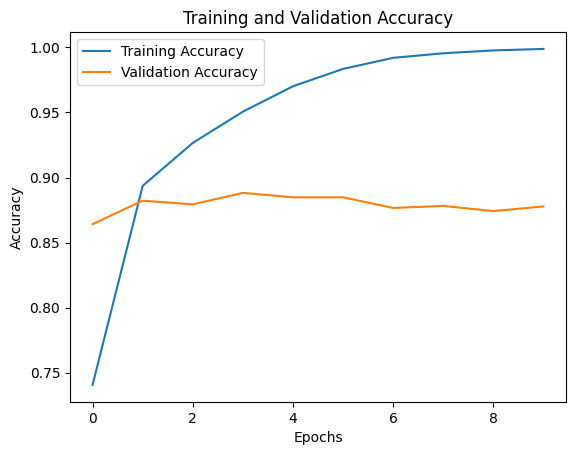

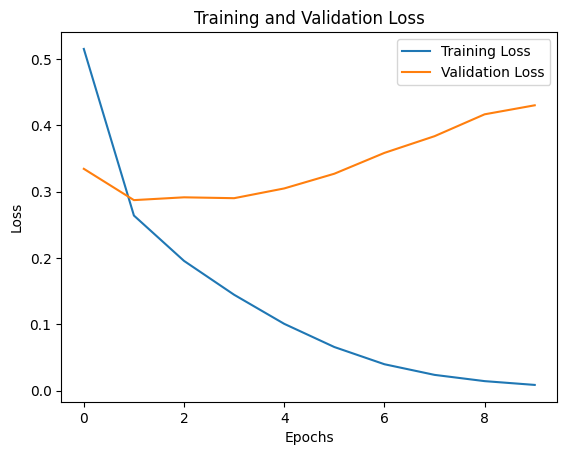

In [11]:
# Visualise the training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Interpreting History Curves

The history curves are typically used to monitor the training and validation performance of a model over epochs. These curves can help you diagnose issues such as overfitting, underfitting, and convergence.

1. **Training and Validation Accuracy Curves**:
   - **Training Accuracy Curve**: Shows the accuracy of the model on the training data over epochs.
   - **Validation Accuracy Curve**: Shows the accuracy of the model on the validation data over epochs.

   **Interpretation**:
   - **Increasing Training Accuracy**: Indicates that the model is learning from the training data.
   - **Stable Validation Accuracy**: If the validation accuracy increases and then stabilizes, it suggests that the model is generalizing well to unseen data.
   - **Diverging Curves**: If the training accuracy continues to increase while the validation accuracy plateaus or decreases, it suggests overfitting. The model is performing well on training data but not on validation data.

2. **Training and Validation Loss Curves**:
   - **Training Loss Curve**: Shows the loss of the model on the training data over epochs.
   - **Validation Loss Curve**: Shows the loss of the model on the validation data over epochs.

   **Interpretation**:
   - **Decreasing Training Loss**: Indicates that the model is improving on the training data.
   - **Stable Validation Loss**: If the validation loss decreases and then stabilizes, it suggests that the model is generalizing well.
   - **Diverging Curves**: If the training loss continues to decrease while the validation loss stabilizes or increases, it suggests overfitting.

In [12]:
train_loss, train_acc = model.evaluate(train_data, train_labels)
print(f'Test Accuracy: {train_acc:.4f}')

test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_acc:.4f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.0905 - accuracy: 0.9751
Test Accuracy: 0.9751
782/782 [==============================] - 2s 3ms/step - loss: 0.4306 - accuracy: 0.8686
Test Accuracy: 0.8686


782/782 [==============================] - 2s 2ms/step
Confusion Matrix:
[[10850  1650]
 [ 1634 10866]]


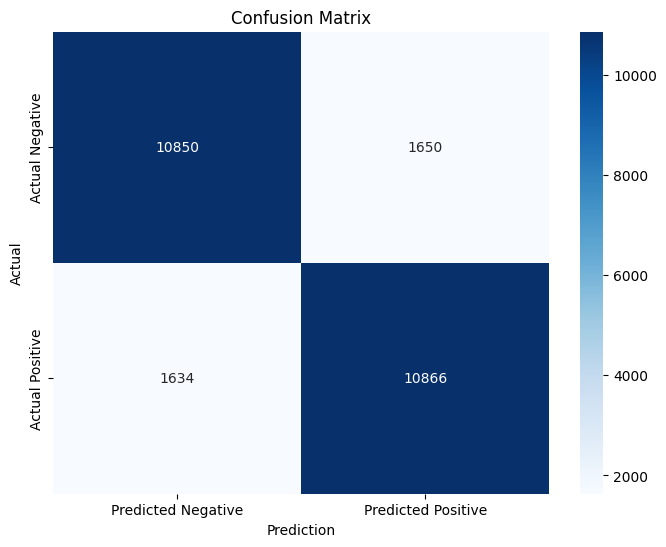

In [13]:
# For classification problems, it is usually useful and informative to look at the confusion matrix.
# Below you can find an example of how to produce a confusion matrix.
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_data)
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Confusion Matrix

The confusion matrix provides a summary of the prediction results on the test data. Each cell in the matrix represents the count of predictions categorized as follows:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP)  | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)  |

**Interpretation**:

1. **True Positives (TP)**: The number of positive instances correctly classified as positive.
2. **True Negatives (TN)**: The number of negative instances correctly classified as negative.
3. **False Positives (FP)**: The number of negative instances incorrectly classified as positive (Type I error).
4. **False Negatives (FN)**: The number of positive instances incorrectly classified as negative (Type II error).

From the confusion matrix, you can derive important performance metrics:

- **Accuracy**: \((TP + TN) / (TP + TN + FP + FN)\)
- **Precision**: \(TP / (TP + FP)\)
- **Recall**: \(TP / (TP + FN)\)
- **F1 Score**: \(2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\)

**Example Confusion Matrix Interpretation**:
If your confusion matrix looks like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | 850                 | 150                 |
| Actual Negative | 100                 | 900                 |

- **True Positives (TP)**: 850
- **True Negatives (TN)**: 900
- **False Positives (FP)**: 100
- **False Negatives (FN)**: 150

From this, you can calculate:
- **Accuracy**: \((850 + 900) / (850 + 900 + 100 + 150) = 0.875\)
- **Precision**: \(850 / (850 + 100) = 0.8947\)
- **Recall**: \(850 / (850 + 150) = 0.85\)
- **F1 Score**: \(2 \times \frac{0.8947 \times 0.85}{0.8947 + 0.85} = 0.8719\)

These metrics will help you evaluate the overall performance of your model and identify areas for improvement.

In [14]:
# If we are satisfied with the model results, we can proceed to make predictions with it.
# Here you can see how to make predictions on the test data.
predictions = model.predict(test_data)

# Print a few predictions and their corresponding true labels
for i in range(5):
    print(f'Review: {test_data[i]}')
    print(f'Predicted Sentiment: {"Positive" if predictions[i] > 0.5 else "Negative"}')
    print(f'True Sentiment: {"Positive" if test_labels[i] == 1 else "Negative"}\n')


782/782 [==============================] - 1s 2ms/step
Review: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    

# Step 5: Deployment

After we made sure that the model performs as expected on new and unseen data, we can proceed to taking our model into production. This step is out of scope for this course, so we will end by saving our model to a file.

In [15]:
# Save the entire model to a HDF5 file
model.save('imdb_model.h5')
print("Model saved to disk.")


Model saved to disk.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# # If you want to load a pretrained model, you can uncomment the code below.
# from keras.models import load_model

# # Load the model from the HDF5 file
# loaded_model = load_model('imdb_model.h5')
# print("Model loaded from disk.")

# # Evaluate the loaded model to confirm it's working
# loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_data, test_labels)
# print(f'Loaded Model Test Accuracy: {loaded_test_acc:.4f}')


# Try it yourself

1. Data Preparation: Modify the code to change the maximum length of the sequences from 256 to 128. What impact does this change have on the model’s performance?

2. Model Architecture: Add a dropout layer between the embedding layer and the flatten layer. How does this affect the model's training and validation accuracy?

3. Evaluation Metrics: Calculate and print the precision, recall, and F1 score for the model on the test data. What do these metrics tell you about the model's performance?
Prediction Analysis:

4. Choose 5 random reviews from the test set and compare the predicted sentiment with the actual sentiment. Are there any interesting observations?